In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# Extract features and targets
X = air_quality.data.features 
y = air_quality.data.targets 

# Create DataFrame from features
df = pd.DataFrame(X, columns=air_quality.feature_names)

# Concatenate 'Date' and 'Time' columns to create a datetime column
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set the datetime column as the index
df.set_index('Date_Time', inplace=True)

cols = df.columns
for j in cols:
    for i in range(0,len(df)):
        if df[j][i] == -200:
            df[j][i] = df[j][i-1]
            
# Select the target variable for time series analysis (e.g., CO level)
ts_data = df['CO(GT)'].dropna()
ts_data_array = ts_data.values

In [ ]:
# Define the Kalman filter model
kf_model = KalmanFilter(
    k_endog=1,  # Number of variables in the time series
    k_states=1,  # Number of states in the Kalman filter
    transition=[[1]],  # State transition matrix
    observation_matrices=[[1]],  # Observation matrix
    initial_state_mean=0,  # Initial state mean
    initial_state_covariance=[[1]],  # Initial state covariance
    observation_covariance=[[1]],  # Observation covariance
    transition_covariance=[[1]]  # Transition covariance
)

# Bind the dataset to the model (using the NumPy array)
kf_model.bind(ts_data_array)

# Initialize the statespace model
kf_model.initialize_known(np.zeros(1), np.eye(1))

# Filter the data
kf_res = kf_model.filter()

# Extract the filtered values
filtered_values = kf_res.filtered_state[:, 0]

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['observation_matrices', 'initial_state_mean', 'initial_state_covariance', 'observation_covariance', 'transition_covariance']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


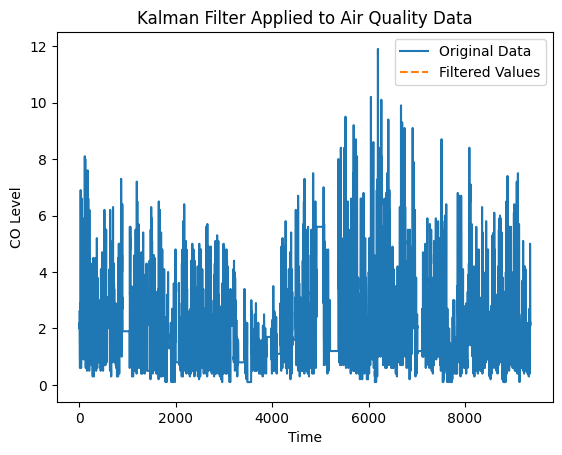

In [ ]:

# Plot the original data and the filtered values
plt.plot(ts_data.values, label='Original Data')
plt.plot(filtered_values, label='Filtered Values', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO Level')
plt.title('Kalman Filter Applied to Air Quality Data')
plt.show()